In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import datetime

In [2]:
df=pd.read_csv('C:/Users/Rory/Downloads/ppd_data.csv',index_col = 'unique_id')
df['deed_date'] = pd.to_datetime(df['deed_date'])
df['deed_date'].dtype

dtype('<M8[ns]')

In [3]:
df.head()

,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,...,F,Unnamed: 22,5,MILL LANE,Unnamed: 25,CARDIFF,CARDIFF.1,CARDIFF.2,B,http://landregistry.data.gov.uk/data/ppi/transaction/68FEB20C-6B59-38DA-E053-6C04A8C051AE/current
unique_id,,,,,,,,,,,,,,,,,,,,,
68FEB20C-6B6B-38DA-E053-6C04A8C051AE,3703345,2017-12-19,CF1 1FL,O,N,F,NaN,6,MILL LANE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404A5AF4-73EF-CD2B-E050-A8C063055C7B,450000,2016-09-16,CF1 3BY,O,N,F,NaN,19,WINDSOR PLACE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50F18103-F400-9FD5-E050-A8C063054923,560000,2017-05-09,CF1 7NJ,O,N,F,NaN,162,PENARTH ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7011B10A-450D-8ED6-E053-6B04A8C075C1,360000,2018-05-30,CF1 7TT,O,N,F,NaN,UNIT 4,PENARTH ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582D0636-B563-8F22-E053-6C04A8C01BAC,57500,2017-07-28,CF1 8LT,F,N,L,NaN,64,LOWER CATHEDRAL ROAD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df[['price_paid','deed_date','postcode','property_type','new_build']]

In [5]:
df.head()

,price_paid,deed_date,postcode,property_type,new_build
unique_id,,,,,
68FEB20C-6B6B-38DA-E053-6C04A8C051AE,3703345,2017-12-19,CF1 1FL,O,N
404A5AF4-73EF-CD2B-E050-A8C063055C7B,450000,2016-09-16,CF1 3BY,O,N
50F18103-F400-9FD5-E050-A8C063054923,560000,2017-05-09,CF1 7NJ,O,N
7011B10A-450D-8ED6-E053-6B04A8C075C1,360000,2018-05-30,CF1 7TT,O,N
582D0636-B563-8F22-E053-6C04A8C01BAC,57500,2017-07-28,CF1 8LT,F,N


In [6]:
df['postcode'].head(50)

unique_id
68FEB20C-6B6B-38DA-E053-6C04A8C051AE     CF1 1FL
404A5AF4-73EF-CD2B-E050-A8C063055C7B     CF1 3BY
50F18103-F400-9FD5-E050-A8C063054923     CF1 7NJ
7011B10A-450D-8ED6-E053-6B04A8C075C1     CF1 7TT
582D0636-B563-8F22-E053-6C04A8C01BAC     CF1 8LT
81EEE99D-A097-4545-B3CB-AB8519911D8B     CF1 9HD
666758D7-9775-3363-E053-6B04A8C0D74E    CF10 1AB
64342BFF-408B-422C-E053-6C04A8C0FB8A    CF10 1AB
5F54B81E-1765-2B45-E053-6B04A8C01FB0    CF10 1AB
666758D7-988C-3363-E053-6B04A8C0D74E    CF10 1AB
A96E4ACC-F09F-9205-E053-6C04A8C0DA09    CF10 1AD
2AC10E50-678F-1AF6-E050-A8C063052BA1    CF10 1AH
8A78B2AF-5D21-5CB0-E053-6B04A8C0F504    CF10 1AQ
DAD5DDE3-D0F4-4A6A-819A-6EC1AE641EEE    CF10 1AQ
07CA4D7F-CFE1-4A36-998C-E1703C8B64E8    CF10 1AQ
D5BB3672-C5D4-49F5-93D8-12B2FD9D738E    CF10 1AQ
42070F39-FA1B-4B55-B2B1-C68E0327E529    CF10 1AQ
923EC8DA-5BED-44FC-BEEE-04BE3424755E    CF10 1AQ
0532820B-A798-4C40-9F10-A3D5A3607CA8    CF10 1AQ
9B361206-0D4B-1904-E053-6B04A8C0EEB5    CF10 1AQ
ACFA63BA-5

In [7]:
df.isnull().sum()

price_paid        0
deed_date         0
postcode         91
property_type     0
new_build         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

price_paid       0
deed_date        0
postcode         0
property_type    0
new_build        0
dtype: int64

In [10]:
df['postcode']=df['postcode'].str[:4]

(733773.0, 737425.0)

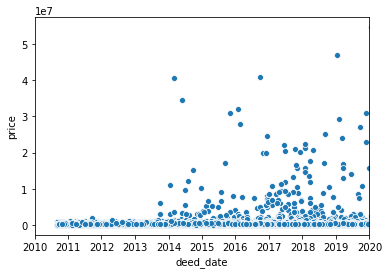

In [11]:
df['property_type'].value_counts()
df['price']=df['price_paid']
ax=sns.scatterplot(x="deed_date", y="price", data=df)
ax.set_xlim([datetime.date(2010, 1, 1), datetime.date(2020, 1, 1)])

Text(0.5,1,'Pre-outlier removal')

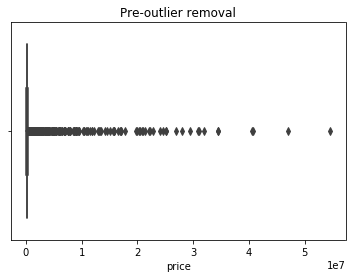

In [12]:
sns.boxplot(x="price", data=df).set_title('Pre-outlier removal')

In [15]:
#Outlier removal - lets get rid of those million pound houses.....
df['Year']=df['deed_date'].dt.year
outliers=[]
threshold=3
yr_mean=pd.DataFrame(df.groupby(['Year'], as_index=False)['price'].mean().set_index('Year'))
yr_std=pd.DataFrame(df.groupby(['Year'], as_index=False).agg({'price':['std']}).set_index('Year'))

for d in df['Year'].unique():                
    for label, row in df.iterrows():
        if row['Year']==d:
            z_score= np.divide(np.subtract(row['price'], (yr_mean.values[yr_mean.index==d])),(yr_std.values[yr_std.index==d]))
            if np.abs(z_score) > threshold:
                outliers.append(label)
        
#Removing outliers
b4size=df['price'].value_counts()
for i in outliers:
    df.drop(i , inplace=True)
aftsize=df['price'].value_counts()

print(b4size-aftsize.size)
print('House sales removed')



125000    -2253
180000    -2345
150000    -2345
175000    -2381
130000    -2384
160000    -2392
165000    -2409
250000    -2433
170000    -2434
140000    -2435
120000    -2445
135000    -2446
185000    -2459
145000    -2467
155000    -2504
190000    -2527
200000    -2544
110000    -2567
210000    -2592
225000    -2594
220000    -2604
115000    -2613
195000    -2615
230000    -2653
100000    -2666
215000    -2674
240000    -2683
205000    -2692
245000    -2695
235000    -2704
           ... 
345050    -3080
168800    -3080
455500    -3080
162525    -3080
273495    -3080
313995    -3080
303750    -3080
289375    -3080
61900     -3080
106950    -3080
2200000   -3080
263250    -3080
1041550   -3080
183979    -3080
193900    -3080
140950    -3080
157246    -3080
445995    -3080
232995    -3080
185800    -3080
269745    -3080
1480000   -3080
423100    -3080
128300    -3080
199955    -3080
460050    -3080
275700    -3080
330995    -3080
181450    -3080
295200    -3080
Name: price, Length: 330

In [ ]:
ax=sns.scatterplot(x="deed_date", y="price", data=df)
ax.set_xlim([datetime.date(2010, 1, 1), datetime.date(2020, 1, 1)])

In [ ]:
sns.boxplot(x="price", data=df).set_title('Post-outlier removal')

In [ ]:
plt.figure(figsize=(40,20))
ax=sns.lineplot(x="Year", y="price", hue="postcode", data=df)


In [16]:
df=df.drop_duplicates(subset=['deed_date','property_type'], keep='first')
postcode=pd.get_dummies(data=df['postcode'],prefix="postcode")
ptype=pd.get_dummies(data=df['property_type'],prefix="ptype")
new=pd.get_dummies(data=df['new_build'],prefix="new")

In [17]:

df.drop(['postcode','property_type','new_build','price_paid','deed_date'],axis=1,inplace=True)


In [18]:
df=pd.concat([df,postcode,ptype,new],axis=1)

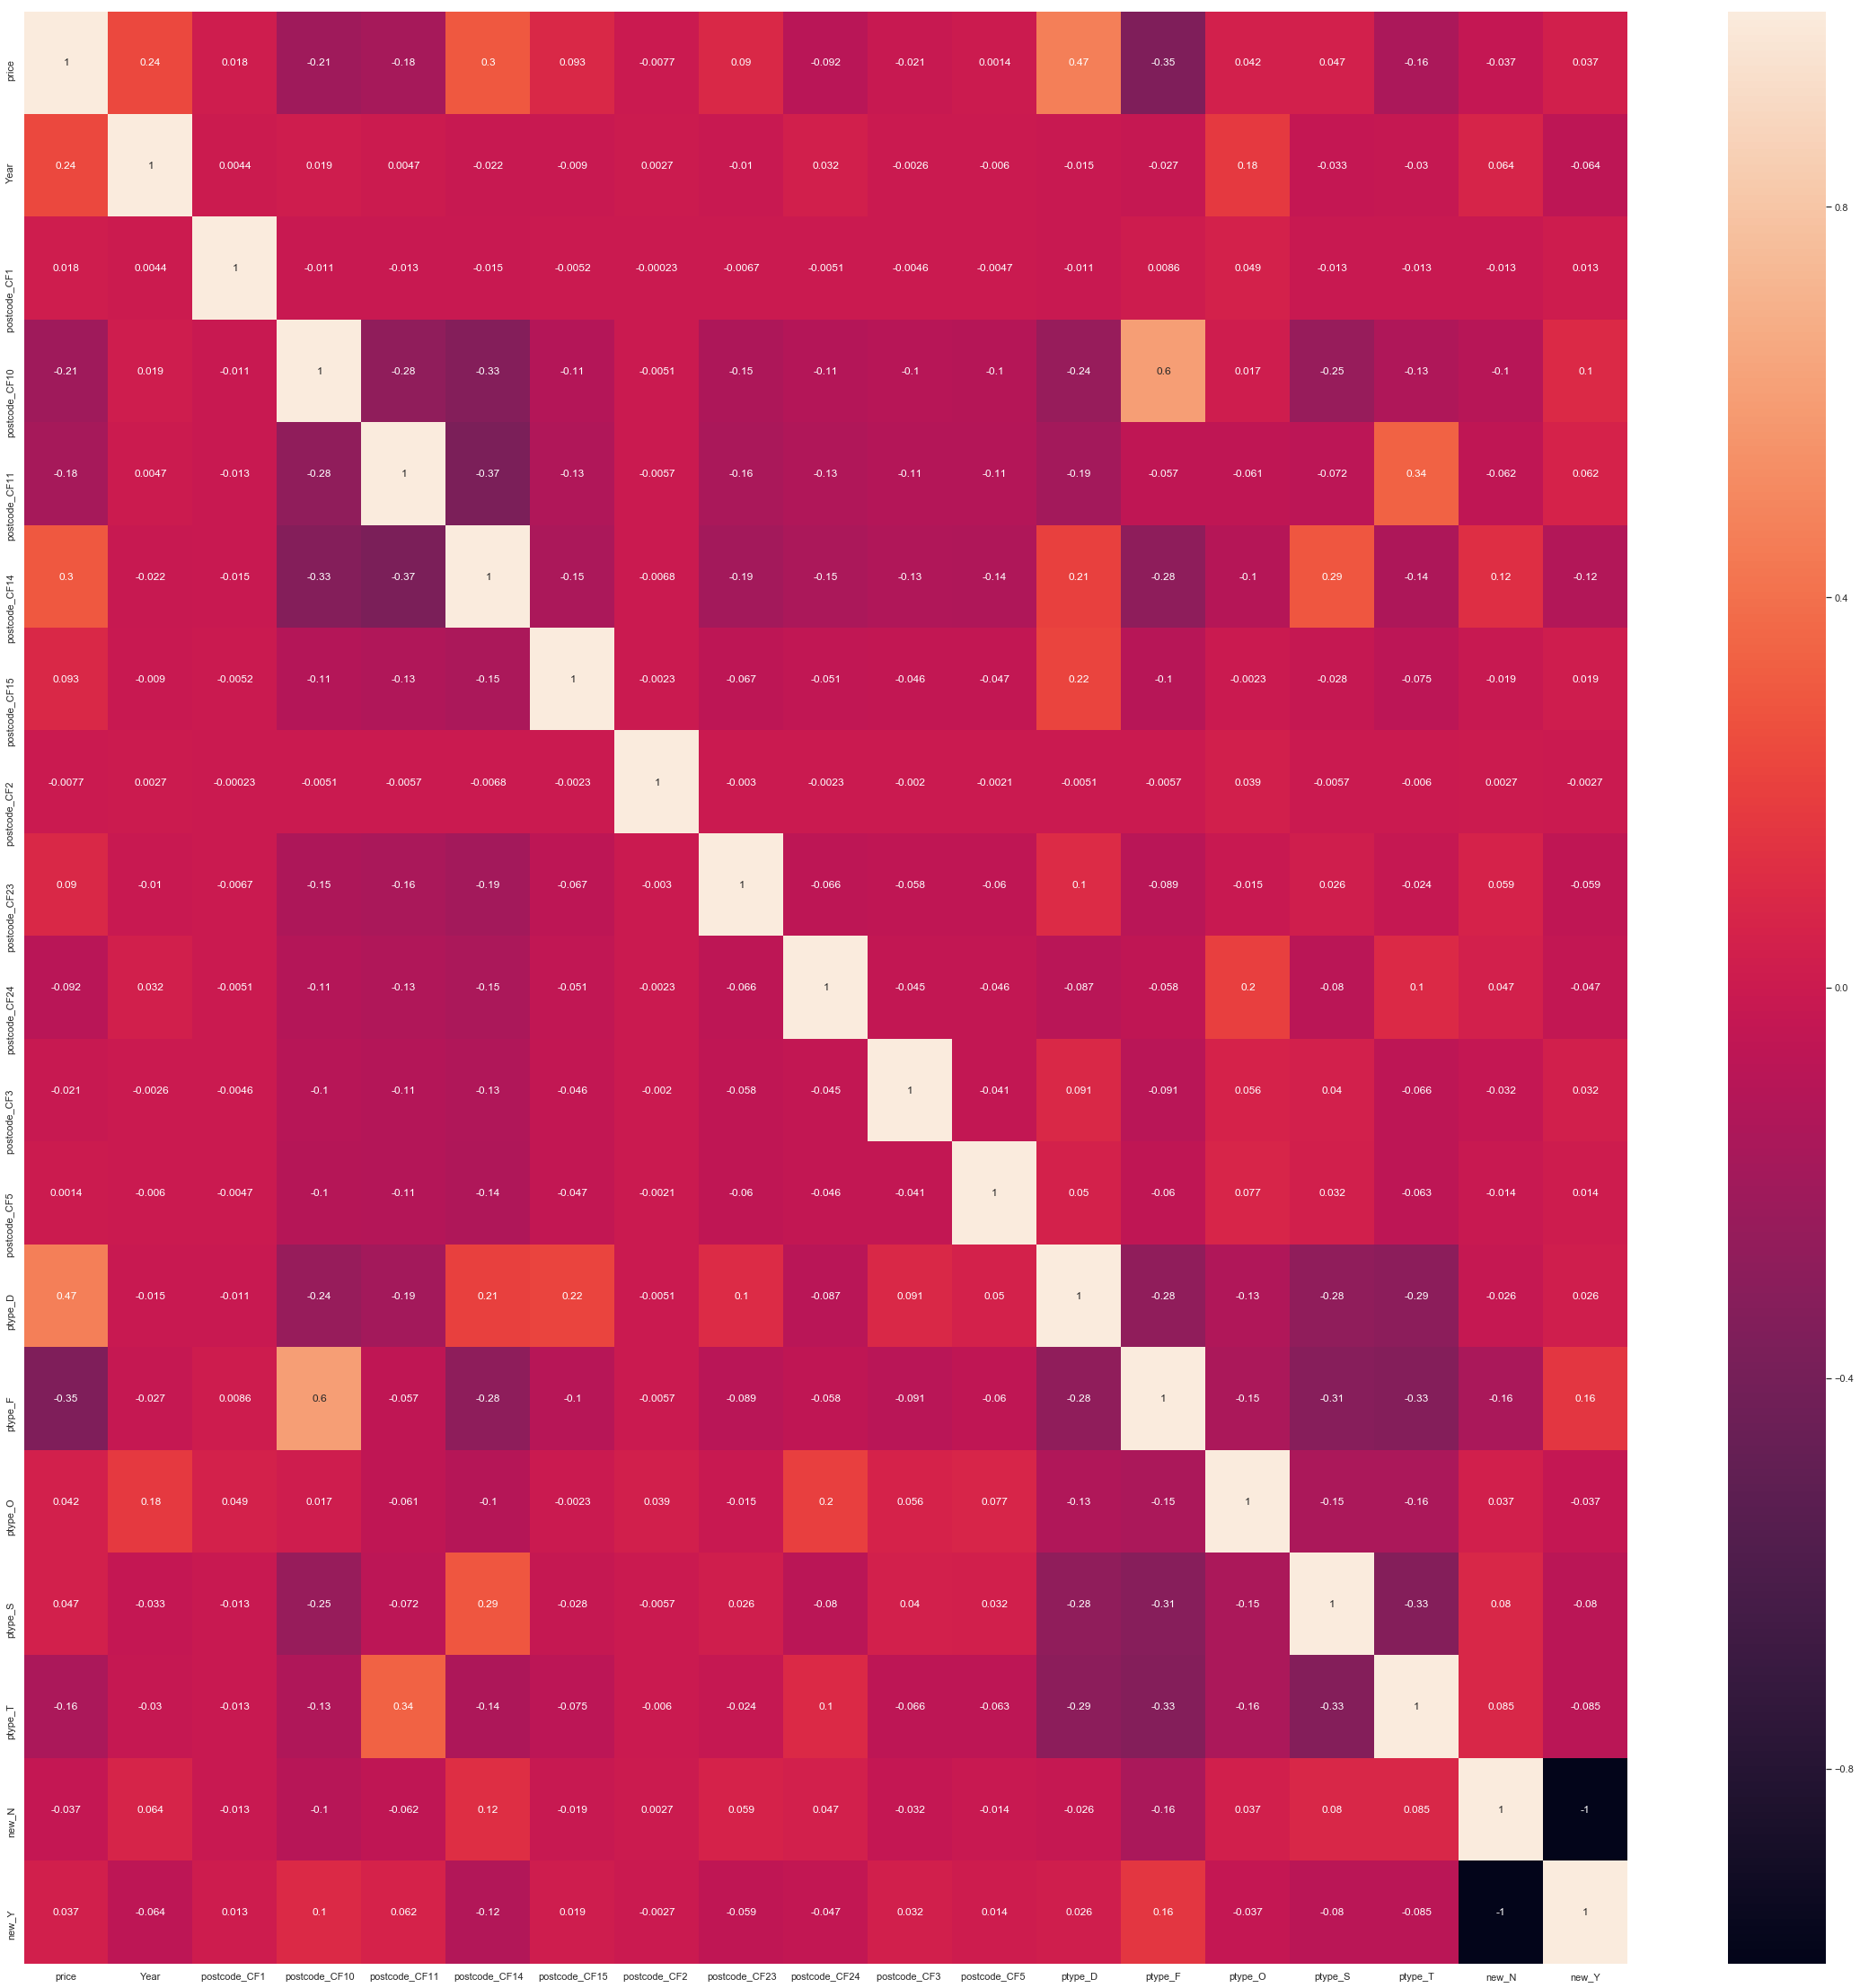

In [19]:
heatmapcorr=df.corr()
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(heatmapcorr, annot=True)

In [22]:
from sklearn.model_selection import train_test_split
Y=df['price'].values
X=df.drop(['price'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [26]:
print(X_train.size)
print(X_test.size)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']

120888
51822


In [24]:
from sklearn.metrics import classification_report, recall_score,confusion_matrix,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier

C:\Users\Rory\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


forest=RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10, class_weight="balanced").fit(X_train, y_train)
rf_yhat=forest.predict(X_test)
std=np.std(rf_yhat==y_test)/np.sqrt(rf_yhat.shape[0])
print("Standard Deviation= %2.4f"% std)
class_forest=classification_report(y_test, rf_yhat)



In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
lr=LogisticRegression().fit(X_train, y_train)
lr_yhat=lr.predict(X_test)
std=np.std(lr_yhat==y_test)/np.sqrt(lr_yhat.shape[0])
print("Standard Deviation= %2.4f"% std)
class_lr=classification_report(y_test, lr_yhat)
print(class_lr)

Standard Deviation= 0.0028
             precision    recall  f1-score   support

        650       0.00      0.00      0.00         1
       1500       0.00      0.00      0.00         1
       3000       0.00      0.00      0.00         2
       4500       0.00      0.00      0.00         1
       5000       0.00      0.00      0.00         2
       6000       0.00      0.00      0.00         1
       6500       0.00      0.00      0.00         1
       7300       0.00      0.00      0.00         1
       8000       0.00      0.00      0.00         1
      10000       0.03      0.25      0.05         4
      10500       0.00      0.00      0.00         1
      13500       0.00      0.00      0.00         1
      15000       0.00      0.00      0.00         2
      16500       0.00      0.00      0.00         1
      18000       0.00      0.00      0.00         1
      20000       0.00      0.00      0.00         2
      23000       0.00      0.00      0.00         1
      25000       

C:\Users\Rory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


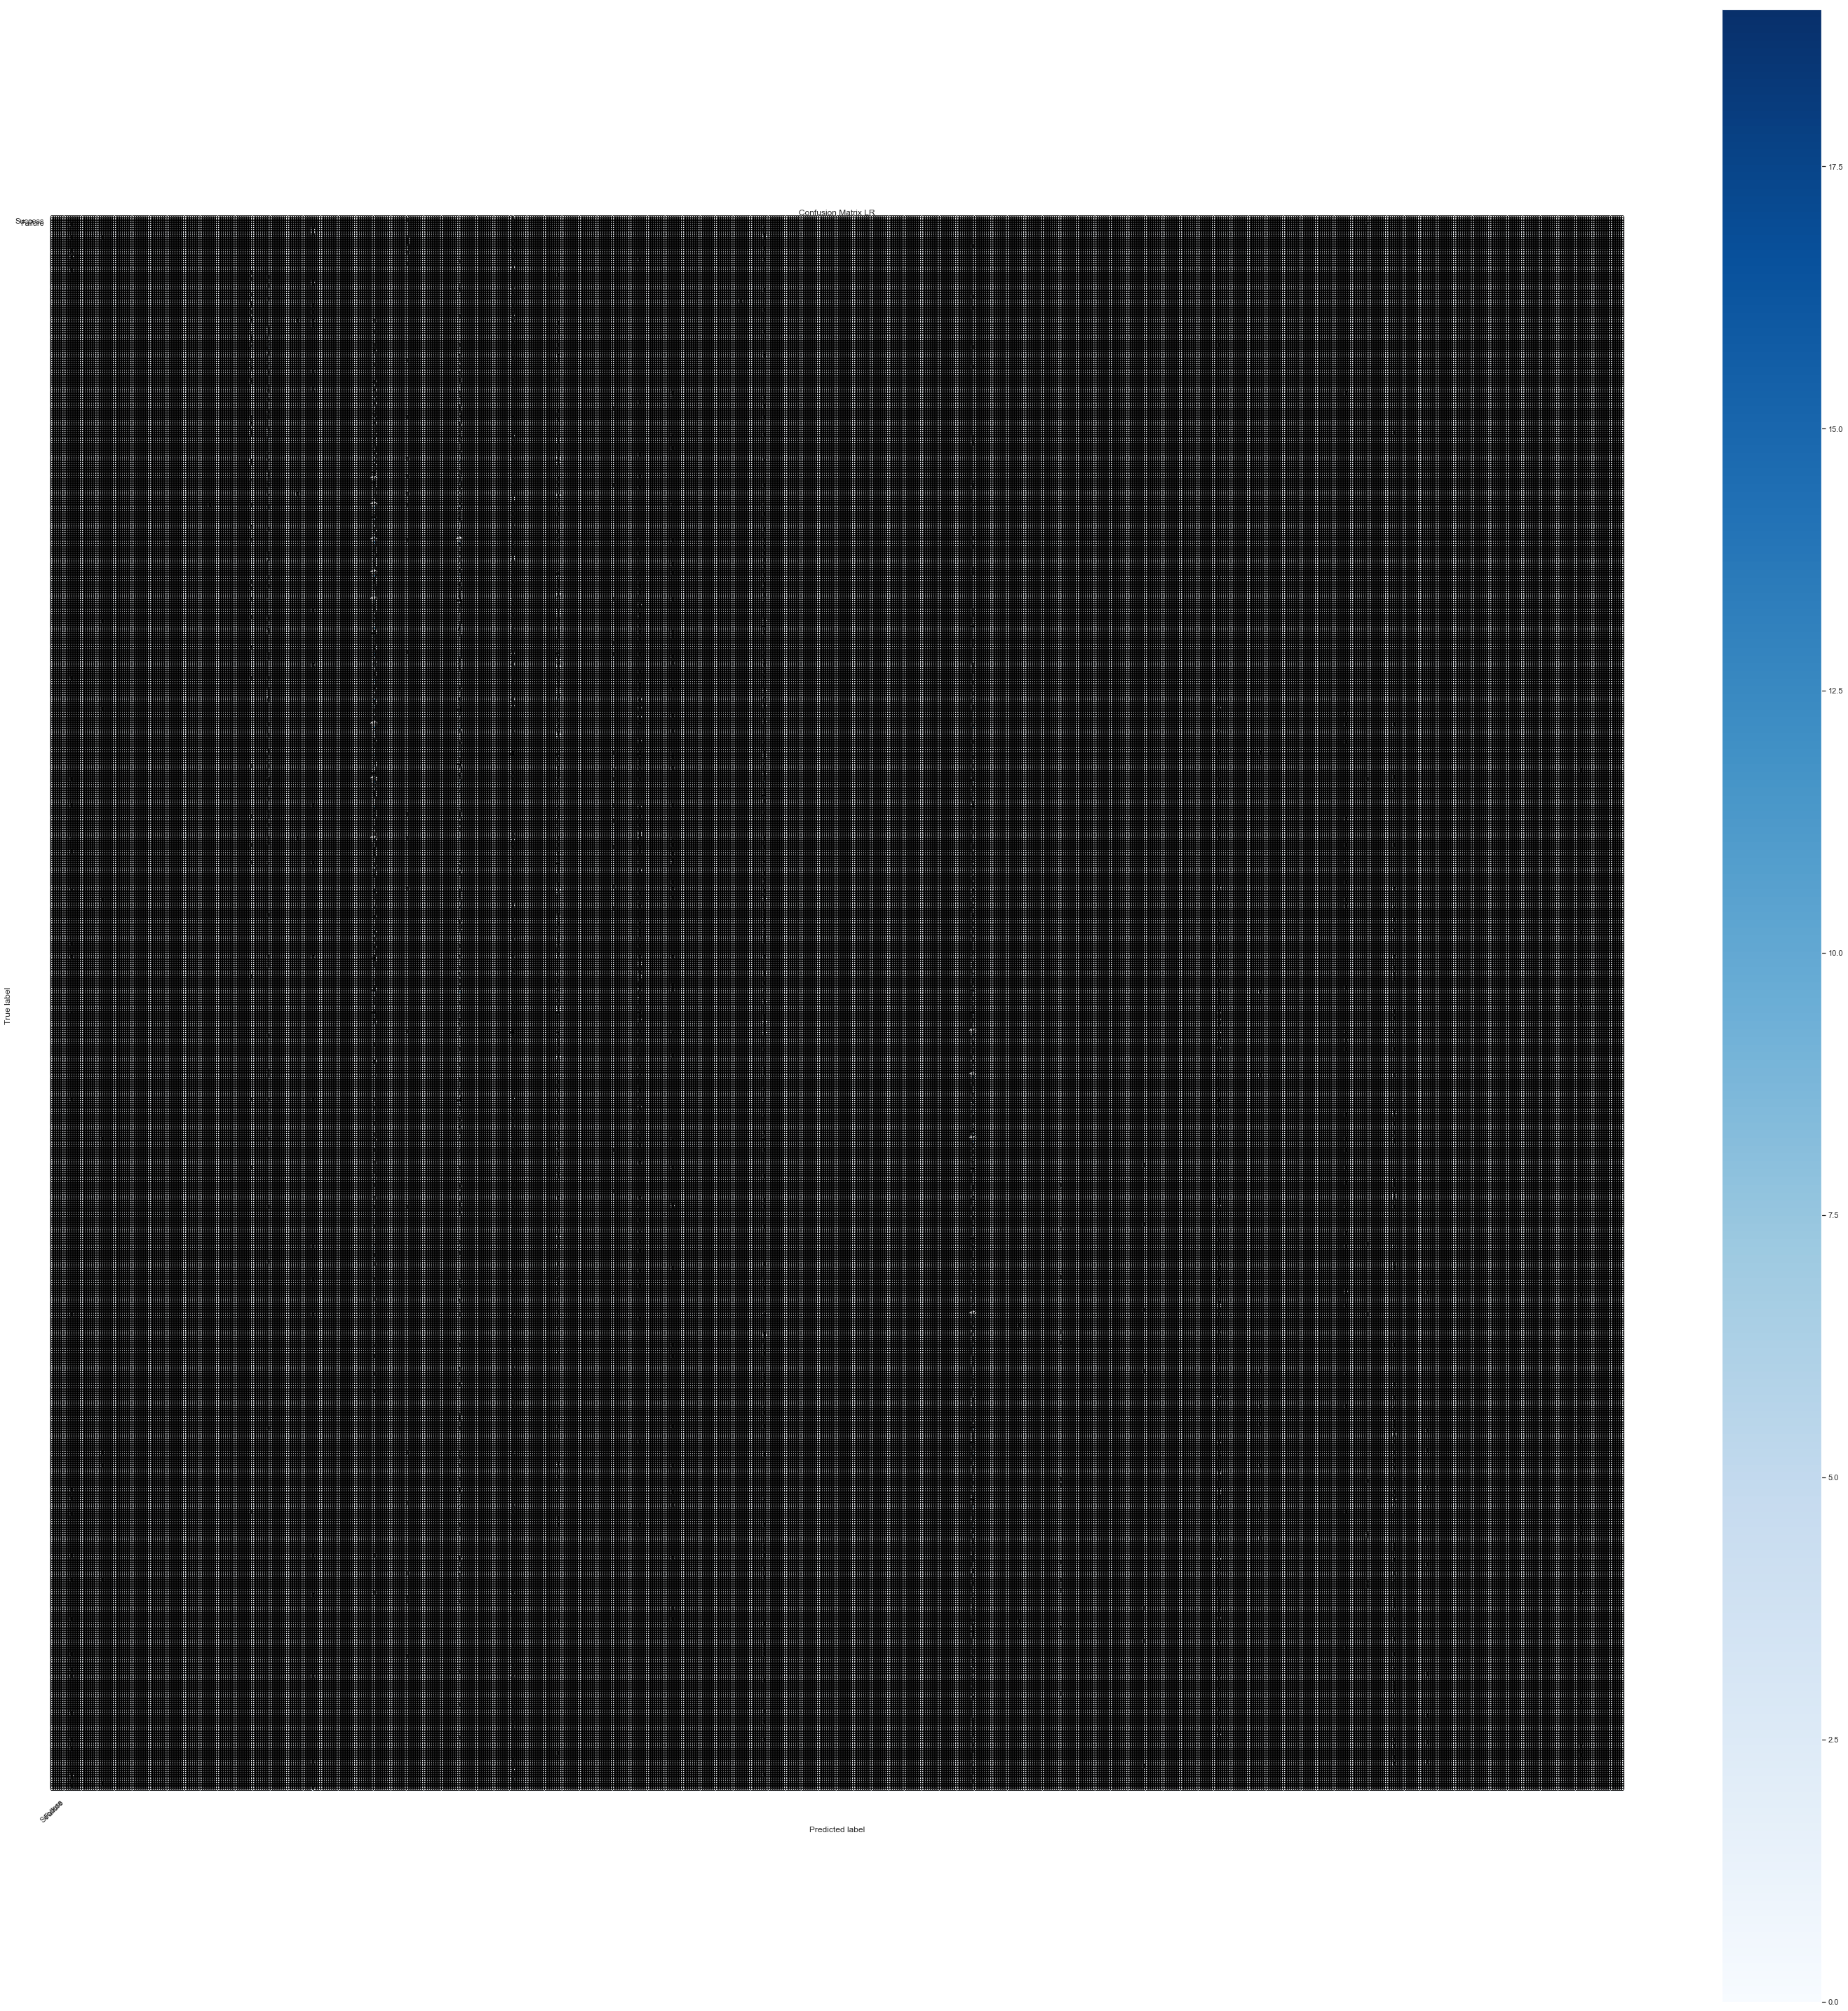

In [27]:
cm_lr=confusion_matrix(y_test,lr_yhat)
plot_confusion_matrix(cm_lr, classes=class_names, title='Confusion Matrix LR')

In [ ]:
gb=GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01).fit(X_train, y_train)
gb_yhat=gb.predict(X_test)
std=np.std(gb_yhat==y_test)/np.sqrt(gb_yhat.shape[0])
print("Standard Deviation= %2.4f"% std)
class_gb=classification_report(y_test, gb_yhat

In [ ]:

#ROC curve - from manibhask on kaggle
#Obtaining False Positive Rate, True Positive Rate and Threshold for all classifiers
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
forest_fpr, forest_tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(forest_fpr, forest_tpr, label='Random Forest')
plt.plot(gb_fpr, gb_tpr, label='GradientBoosting')
#Plot Base Rate ROC
plt.plot([0,1],[0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# Calcualting important features in the model
importances = model.feature_importances_
feat_names = df.drop(['CarInsurance'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()